<a href="https://colab.research.google.com/github/yebiny/GANexample/blob/master/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GAN

### Library import

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [1]:

# mnist data를 import해서 mnist라는 변수에 저장
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

W0905 04:13:11.164591 140249158707072 deprecation.py:323] From <ipython-input-1-4dcbd946c02b>:2: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0905 04:13:11.166367 140249158707072 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0905 04:13:11.168102 140249158707072 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./mnist/data/train-images-idx3-ubyte.gz


W0905 04:13:12.358089 140249158707072 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0905 04:13:12.360707 140249158707072 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz


W0905 04:13:12.765490 140249158707072 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


## hyper parameter set

In [0]:
total_epoch = 100
batch_size = 100
learning_rate = 0.0002

## cell option

In [0]:
n_hidden = 256
n_input = 28*28
n_noise = 128

In [0]:
X = tf.placeholder(tf.float32, [None, n_input]) # 입력으로 들어갈 이미지가 이 변수에 담기게 될 예정
Z = tf.placeholder(tf.float32, [None, n_noise]) # 노이즈 Z를 입력값으로 사용

## Generator

In [0]:
G_W1 = tf.Variable(tf.random_normal([n_noise, n_hidden], stddev=0.01)) # 랜덤한 숫자로 weight를 초기화
G_b1 = tf.Variable(tf.zeros([n_hidden])) # 0으로 초기화
G_W2 = tf.Variable(tf.random_normal([n_hidden, n_input], stddev=0.01))
G_b2 = tf.Variable(tf.zeros([n_input]))


# 생성기(Generator)의 신경망을 구성
def generator(noise_z):
    hidden = tf.nn.relu(tf.matmul(noise_z, G_W1) + G_b1) # hidden layer는 relu 사용. noise_z가 input으로 들어간다.
    output = tf.nn.sigmoid(tf.matmul(hidden, G_W2) + G_b2) # output은 sigmoid를 사용하여 0과 1사이 값으로 output이 나오도록 한다.
    return output
  
G_var_list = [G_W1, G_b1, G_W2, G_b2]

## Discriminator

In [0]:
D_W1 = tf.Variable(tf.random_normal([n_input, n_hidden], stddev=0.01))
D_b1 = tf.Variable(tf.zeros([n_hidden]))
# 판별기의 최종 결과값은 얼마나 진짜와 가깝냐를 판단하는 한 개의 스칼라값
D_W2 = tf.Variable(tf.random_normal([n_hidden, 1], stddev=0.01))
D_b2 = tf.Variable(tf.zeros([1])) # 한개의 스칼라 값 = 숫자 하나를 0으로 초기화

# 판별기(Discriminator)의 신경망을 구성
def discriminator(inputs):
    hidden = tf.nn.relu(tf.matmul(inputs, D_W1) + D_b1) # inputs(이미지)가 input으로 들어감
    output = tf.nn.sigmoid(tf.matmul(hidden, D_W2) + D_b2) # 마찬가지로 sigmoid를 사용하여 0과 1사이 값으로 나오고 참/거짓으로 분류
    return output
  
  
D_var_list = [D_W1, D_b1, D_W2, D_b2]

## Noise
* Noise Z를 랜덤하게 생성합니다. 
* 생성된 노이즈를 이용해 랜덤한 이미지 G를 생성합니다.
* 생성된 이미지 G가 진짜이미지인지 판별한 값을 구합니다.
* 실제 이미지 X를 판별 기준값으로 둡니다.

In [0]:
# 랜덤한 노이즈(Z) 생성
def get_noise(batch_size, n_noise):
    return np.random.normal(size=(batch_size, n_noise))
  
# 노이즈를 이용해 랜덤한 이미지를 생성
G = generator(Z)
# 노이즈를 이용해 생성한 이미지가 진짜 이미지인지 판별한 값을 구함
D_gene = discriminator(G)
# 진짜 이미지를 이용해 판별한 값을 구함
D_real = discriminator(X)

## Generator loss

* 생성기(G)는 가짜 이미지를 넣었을 때 D가 실제 이미지라고 판단하도록 D_gene 값을 최대화 하도록 학습한다
* GAN 논문의 수식에 따르면 loss 를 극대화 해야하지만, minimize 하는 최적화 함수를 사용하기 때문에 최적화 하려는 loss_D 와 loss_G 에 음수 부호를 붙여줌

In [0]:
loss_G = tf.reduce_mean(tf.log(D_gene))
train_G = tf.train.AdamOptimizer(learning_rate).minimize(-loss_G,var_list=G_var_list)

## Discriminator loss
* 판별기(D)에 진짜 이미지 tf.log(D_real)를 넣었을 때도 가짜 이미지 tf.log(1 - D_gene)를 넣었을 때도 최대값을 갖도록 학습한다
* GAN 논문의 수식에 따르면 loss 를 극대화 해야하지만, minimize 하는 최적화 함수를 사용하기 때문에 최적화 하려는 loss_D 와 loss_G 에 음수 부호를 붙여줌

In [0]:
loss_D = tf.reduce_mean(tf.log(D_real) + tf.log(1 - D_gene))
train_D = tf.train.AdamOptimizer(learning_rate).minimize(-loss_D,var_list=D_var_list)

## Model training

Epoch: 0000 D loss: -0.3823 G loss: -2.212


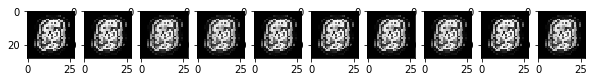

Epoch: 0001 D loss: -0.1896 G loss: -2.691
Epoch: 0002 D loss: -0.1341 G loss: -3.023
Epoch: 0003 D loss: -0.7347 G loss: -1.263
Epoch: 0004 D loss: -0.3613 G loss: -1.919
Epoch: 0005 D loss: -0.409 G loss: -2.283
Epoch: 0006 D loss: -0.104 G loss: -3.448
Epoch: 0007 D loss: -0.2172 G loss: -2.952
Epoch: 0008 D loss: -0.17 G loss: -2.881
Epoch: 0009 D loss: -0.09138 G loss: -3.344


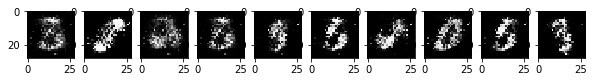

Epoch: 0010 D loss: -0.2563 G loss: -2.789
Epoch: 0011 D loss: -0.4608 G loss: -2.181
Epoch: 0012 D loss: -0.3771 G loss: -2.344
Epoch: 0013 D loss: -0.438 G loss: -2.265
Epoch: 0014 D loss: -0.2713 G loss: -2.683
Epoch: 0015 D loss: -0.269 G loss: -2.905
Epoch: 0016 D loss: -0.4749 G loss: -2.46
Epoch: 0017 D loss: -0.3677 G loss: -2.63
Epoch: 0018 D loss: -0.3046 G loss: -2.763
Epoch: 0019 D loss: -0.3672 G loss: -2.876


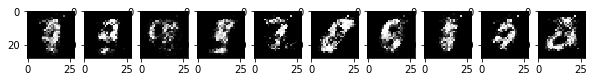

Epoch: 0020 D loss: -0.3399 G loss: -2.591
Epoch: 0021 D loss: -0.2543 G loss: -3.155
Epoch: 0022 D loss: -0.4062 G loss: -3.059
Epoch: 0023 D loss: -0.4381 G loss: -2.649
Epoch: 0024 D loss: -0.6145 G loss: -2.249
Epoch: 0025 D loss: -0.4625 G loss: -2.529
Epoch: 0026 D loss: -0.4867 G loss: -2.827
Epoch: 0027 D loss: -0.4332 G loss: -2.407
Epoch: 0028 D loss: -0.3955 G loss: -2.739
Epoch: 0029 D loss: -0.5285 G loss: -2.286


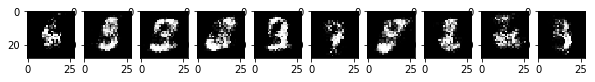

Epoch: 0030 D loss: -0.4285 G loss: -2.541
Epoch: 0031 D loss: -0.5864 G loss: -2.275
Epoch: 0032 D loss: -0.4667 G loss: -2.738
Epoch: 0033 D loss: -0.4704 G loss: -2.773
Epoch: 0034 D loss: -0.5835 G loss: -2.311
Epoch: 0035 D loss: -0.6379 G loss: -2.179
Epoch: 0036 D loss: -0.5908 G loss: -2.272
Epoch: 0037 D loss: -0.4765 G loss: -2.272
Epoch: 0038 D loss: -0.5896 G loss: -2.205
Epoch: 0039 D loss: -0.5966 G loss: -2.175


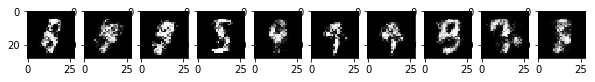

Epoch: 0040 D loss: -0.5808 G loss: -1.977
Epoch: 0041 D loss: -0.7496 G loss: -2.108
Epoch: 0042 D loss: -0.6671 G loss: -1.953
Epoch: 0043 D loss: -0.6797 G loss: -2.502
Epoch: 0044 D loss: -0.5393 G loss: -2.113
Epoch: 0045 D loss: -0.7807 G loss: -1.846
Epoch: 0046 D loss: -0.7369 G loss: -1.935
Epoch: 0047 D loss: -0.6677 G loss: -1.926
Epoch: 0048 D loss: -0.6617 G loss: -2.125
Epoch: 0049 D loss: -0.7236 G loss: -2.07


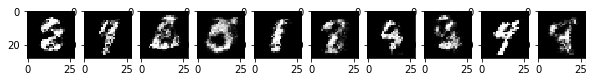

Epoch: 0050 D loss: -0.7387 G loss: -1.999
Epoch: 0051 D loss: -0.7535 G loss: -2.174
Epoch: 0052 D loss: -0.7822 G loss: -1.981
Epoch: 0053 D loss: -0.8708 G loss: -1.855
Epoch: 0054 D loss: -0.7852 G loss: -1.803
Epoch: 0055 D loss: -0.7618 G loss: -1.768
Epoch: 0056 D loss: -0.8839 G loss: -1.655
Epoch: 0057 D loss: -0.814 G loss: -1.66
Epoch: 0058 D loss: -0.7775 G loss: -1.746
Epoch: 0059 D loss: -0.8453 G loss: -1.671


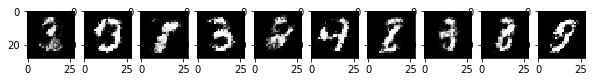

Epoch: 0060 D loss: -0.8133 G loss: -1.699
Epoch: 0061 D loss: -0.901 G loss: -1.579
Epoch: 0062 D loss: -0.7612 G loss: -1.912
Epoch: 0063 D loss: -0.8503 G loss: -1.868
Epoch: 0064 D loss: -0.8408 G loss: -1.508
Epoch: 0065 D loss: -0.9088 G loss: -1.795
Epoch: 0066 D loss: -0.8487 G loss: -1.668
Epoch: 0067 D loss: -0.7226 G loss: -1.894
Epoch: 0068 D loss: -0.8014 G loss: -1.741
Epoch: 0069 D loss: -0.8012 G loss: -1.809


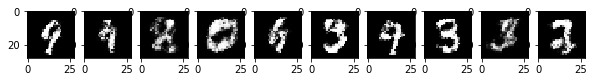

Epoch: 0070 D loss: -0.8893 G loss: -1.561
Epoch: 0071 D loss: -0.8532 G loss: -1.455
Epoch: 0072 D loss: -1.0 G loss: -1.628
Epoch: 0073 D loss: -0.9621 G loss: -1.642
Epoch: 0074 D loss: -0.8602 G loss: -1.584
Epoch: 0075 D loss: -0.8968 G loss: -1.635
Epoch: 0076 D loss: -0.8871 G loss: -1.532
Epoch: 0077 D loss: -0.8057 G loss: -1.823
Epoch: 0078 D loss: -0.8584 G loss: -1.713
Epoch: 0079 D loss: -0.7726 G loss: -1.936


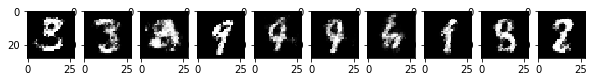

Epoch: 0080 D loss: -0.8845 G loss: -1.43
Epoch: 0081 D loss: -0.8306 G loss: -1.639
Epoch: 0082 D loss: -0.9591 G loss: -1.798
Epoch: 0083 D loss: -0.9221 G loss: -1.62
Epoch: 0084 D loss: -0.906 G loss: -1.603
Epoch: 0085 D loss: -0.9159 G loss: -1.539
Epoch: 0086 D loss: -0.8753 G loss: -1.588
Epoch: 0087 D loss: -0.8491 G loss: -1.774
Epoch: 0088 D loss: -0.6918 G loss: -1.837
Epoch: 0089 D loss: -1.096 G loss: -1.572


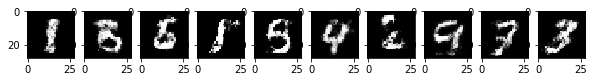

Epoch: 0090 D loss: -0.852 G loss: -1.703
Epoch: 0091 D loss: -0.756 G loss: -1.616
Epoch: 0092 D loss: -0.8834 G loss: -1.568
Epoch: 0093 D loss: -0.8984 G loss: -1.378
Epoch: 0094 D loss: -0.8139 G loss: -1.663
Epoch: 0095 D loss: -0.8154 G loss: -1.562
Epoch: 0096 D loss: -0.8444 G loss: -1.715
Epoch: 0097 D loss: -0.8445 G loss: -1.67
Epoch: 0098 D loss: -0.7516 G loss: -1.84
Epoch: 0099 D loss: -0.8985 G loss: -1.515


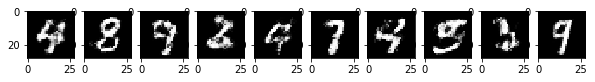

최적화 완료!


In [34]:
# 신경망 모델 학습

sess = tf.Session() # 세션 생성
sess.run(tf.global_variables_initializer()) # 변수 초기화

total_batch = int(mnist.train.num_examples/batch_size) # 전체 이미지 갯수/batch_size 해서 한번 학습 할때 100batch_size로 몇번을 해야 1epoch을 도는지 계산
loss_val_D, loss_val_G = 0, 0 # 변수 0으로 초기화

for epoch in range(total_epoch):
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        noise = get_noise(batch_size, n_noise)

        # 판별기와 생성기 신경망을 각각 학습
        _, loss_val_D = sess.run([train_D, loss_D], feed_dict={X: batch_xs, Z: noise})
        _, loss_val_G = sess.run([train_G, loss_G], feed_dict={Z: noise})

    print('Epoch:', '%04d' % epoch,
          'D loss: {:.4}'.format(loss_val_D),
          'G loss: {:.4}'.format(loss_val_G))
    
    
    # 학습이 되어가는 모습을 보기 위해 주기적으로 이미지를 보여줌
    if epoch == 0 or (epoch + 1) % 10 == 0:
        sample_size = 10
        noise = get_noise(sample_size, n_noise)
        samples = sess.run(G, feed_dict={Z: noise})
        
        fig, ax = plt.subplots(1, sample_size, figsize=(sample_size, 1))

        for i in range(sample_size):
            ax[i].imshow(np.reshape(samples[i], (28, 28)), 'gray')
        
        plt.show()

print('최적화 완료!')